In [1]:
!pip install matplotlib deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.9 MB/s eta 0:00:00


In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms
import heapq
from heapq import heappop, heappush



In [3]:
num_locations = 10
locations = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)]
depot = (50, 50)
num_vehicles = 3

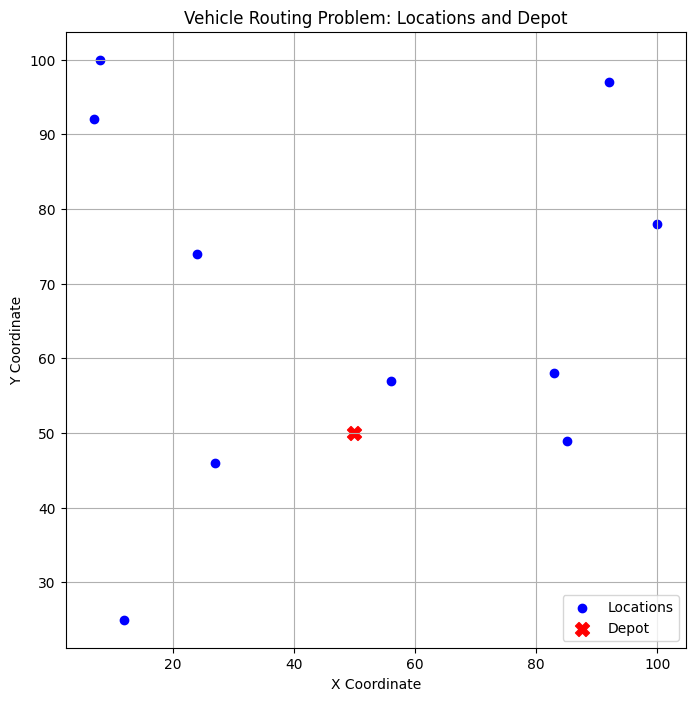

In [4]:
plt.figure(figsize=(8, 8))
x_coords, y_coords = zip(*locations)
plt.scatter(x_coords, y_coords, c="blue", label="Locations")
plt.scatter(*depot, c="red", label="Depot", s=100, marker="X")
plt.title("Vehicle Routing Problem: Locations and Depot")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.legend()
plt.grid()
plt.show()

In [5]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

In [6]:
toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [7]:
def evalVRPHeap(individual):
    total_distance = 0
    heap = []
    distances = [0] * num_vehicles
    for i in range(num_vehicles):
      heapq. heappush(heap, (0, i))
    routes = [[] for _ in range(num_vehicles)]
    for loc_index in individual:
        loc = locations[loc_index]
        current_distance, vehicle_idx = heappop(heap)
        if routes[vehicle_idx]:
            last_location = routes[vehicle_idx][-1]
        else:
            last_location = depot
        added_distance = np.linalg.norm(np.array(last_location) - np.array(loc))
        current_distance += added_distance
        distances[vehicle_idx] += added_distance
        routes[vehicle_idx].append(loc)
        heappush(heap, (current_distance, vehicle_idx))
    for i in range(num_vehicles):
        if routes[i]:
            last_location = routes[i][-1]
            distances[i] += np.linalg.norm(np.array(last_location) - np.array(depot))
    total_distance = sum(distances)
    balance_penalty = np.std(distances)
    return total_distance + 10 * balance_penalty,


In [8]:
toolbox.register("evaluate", evalVRPHeap)
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)


In [9]:
def plot_routes(individual, title="Routes"):
    plt.figure()
    # Plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    # Draw routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-', 'rs')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

gen	nevals	avg    	min    
0  	300   	935.882	557.901
1  	218   	867.618	557.901
2  	240   	871.769	557.901
3  	240   	857.958	557.901
4  	233   	855.429	557.901
5  	229   	851.402	557.901
6  	222   	827.435	557.901
7  	239   	841.406	557.901
8  	226   	824.873	557.901
9  	239   	828.513	557.901
10 	233   	824.889	529.419
11 	229   	807.801	549.286
12 	229   	782.211	497.286
13 	227   	743.498	528.19 
14 	207   	707.478	528.19 
15 	233   	709.235	528.19 
16 	227   	695.715	506.509
17 	228   	678.685	506.509
18 	243   	671.398	506.509
19 	237   	686.523	506.509
20 	238   	722.05 	506.509
21 	242   	719.426	506.509
22 	224   	718.305	506.509
23 	238   	708.967	506.509
24 	221   	707.877	506.509
25 	234   	713.131	506.509
26 	221   	699.348	506.509
27 	229   	655.585	506.509
28 	217   	617.558	505.682
29 	247   	603.587	489.816
30 	233   	580.77 	489.816
Best Individual:  [4, 8, 0, 2, 6, 7, 5, 9, 1, 3]
Best Fitness:  489.8156724169827


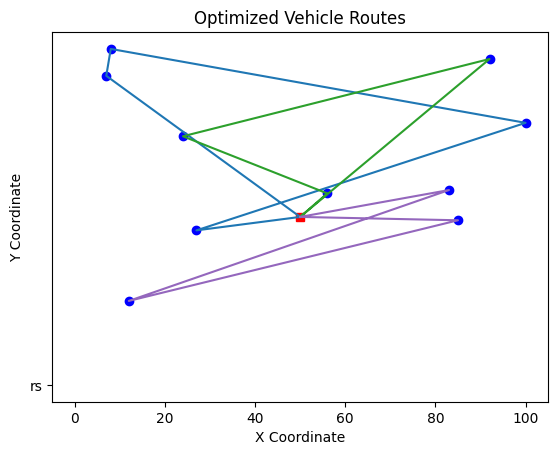

In [10]:
def main():
    random.seed(42)
    pop = toolbox.population(n=300)
    hof = tools.HallOfFame(1)

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Run the genetic algorithm
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 30, stats=stats, halloffame=hof)

    return pop, stats, hof

if __name__ == "__main__":
    pop, stats, hof = main()

    # Print results
    print("Best Individual: ", hof[0])
    print("Best Fitness: ", hof[0].fitness.values[0])

    # Plot the best solution
    plot_routes(hof[0], title="Optimized Vehicle Routes")

In [11]:
def run_ga():
    population = toolbox.population(n=50)
    NGEN = 100
    CXPB, MUTPB = 0.7, 0.2
    for gen in range(NGEN):
        offspring = algorithms.varAnd(population, toolbox, cxpb=CXPB, mutpb=MUTPB)
        for ind in offspring:
            ind.fitness.values = toolbox.evaluate(ind)
        population = toolbox.select(offspring, k=len(population))
    return tools.selBest(population, k=1)[0]

In [12]:
best_solution = run_ga()
print("Best solution (sequence of locations):", best_solution)
best_total_distance = evalVRPHeap(best_solution)[0]
print("Total weighted distance (including balance penalty):",best_total_distance)


Best solution (sequence of locations): [0, 3, 8, 2, 7, 9, 5, 6, 1, 4]
Total weighted distance (including balance penalty): 489.8156724169828


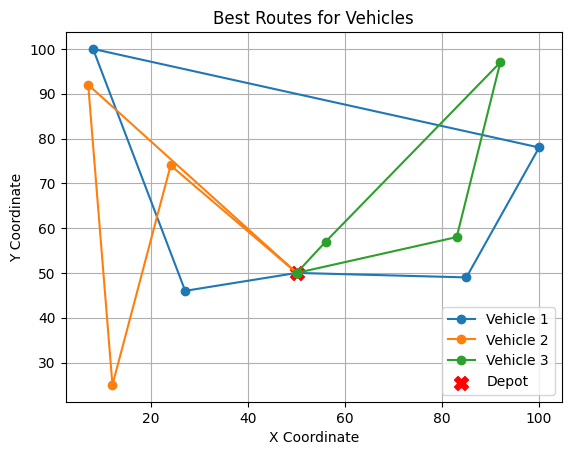

In [13]:
for v in range(num_vehicles):
    vehicle_route = [depot] + [locations[best_solution[j]] for j in range(v, len(best_solution), num_vehicles)] + [depot]
    x_coords, y_coords = zip(*vehicle_route)
    plt.plot(x_coords, y_coords, marker="o", label=f"Vehicle {v + 1}")

plt.scatter(*depot, c="red", s=100, label="Depot", marker="X")
plt.title("Best Routes for Vehicles")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.legend()
plt.grid()
plt.show()

